In [1]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 39.03 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img

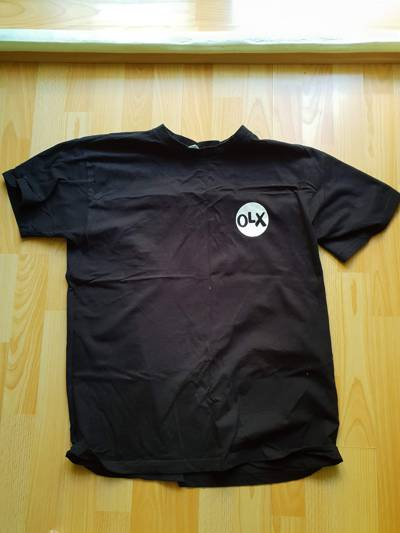

In [ ]:
path = './clothing-dataset-small/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
load_img(path)

In [ ]:
img = load_img(path, target_size=(299,299))

In [ ]:
x = np.array(img)
x.shape

(299, 299, 3)

**Pre-Trained convolutional netral networks**

In [4]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [ ]:
model = Xception(weights='imagenet', input_shape=(299,299,3))

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
X = np.array([x])
X = preprocess_input(X)
#It turns the color bytes (0-255) to a number between the -1 and 1

In [ ]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step


In [ ]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


[[('n03595614', 'jersey', np.float32(0.68196356)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038139977)),
  ('n04370456', 'sweatshirt', np.float32(0.034324735)),
  ('n03710637', 'maillot', np.float32(0.011354207)),
  ('n04525038', 'velvet', np.float32(0.0018453562))]]

We didn't get desired results

### Transfer Learning


> Making customized dense layers and adding our classes for better and customized prediction




In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train/',
    target_size=(150,150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [ ]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [ ]:
x ,y = next(train_ds)
# X = Feature, images
# y = Labels

In [ ]:
x

array([[[[ 0.39607847,  0.1686275 ,  0.18431377],
         [-0.31764704, -0.45098037, -0.5058824 ],
         [-0.32549018, -0.4352941 , -0.52156866],
         ...,
         [ 0.09019613, -0.654902  , -0.4980392 ],
         [ 0.12941182, -0.6156863 , -0.4588235 ],
         [ 0.06666672, -0.6784314 , -0.52156866]],

        [[-0.38823527, -0.5372549 , -0.5686275 ],
         [-0.45098037, -0.5294118 , -0.60784316],
         [-0.23137254, -0.30196077, -0.41960782],
         ...,
         [ 0.16078436, -0.67058825, -0.49019605],
         [ 0.19215691, -0.6392157 , -0.4588235 ],
         [ 0.17647064, -0.6392157 , -0.4588235 ]],

        [[-0.2235294 , -0.372549  , -0.41960782],
         [-0.29411763, -0.35686272, -0.4588235 ],
         [ 0.36470592,  0.3176471 ,  0.19215691],
         ...,
         [ 0.2313726 , -0.6156863 , -0.42745095],
         [ 0.18431377, -0.5921569 , -0.42745095],
         [ 0.15294123, -0.5764706 , -0.42745095]],

        ...,

        [[-0.19215685, -0.4352941 , -0

In [ ]:

x.shape

(32, 150, 150, 3)

In [ ]:
y[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# This 'y' is some kind of the hot-encoding for our classes
# Multiclass classification

In [ ]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation/',
    target_size=(150,150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [ ]:
# Here we use Xception as a base model and we gonna build our model on top of it
# Our model is customized to classification in our classes like dresses

In [ ]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)
# 'Include_top = false' is for saving the convolutional layers for our use case
# When we turn it to false it will remove the dense layers

base_model.trainable = False
# It means we don't want to change the convolutional layers

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


# Now we want to make new top layers

In [ ]:
inputs = keras.Input(shape=(150,150,3))
# This the input images

base = base_model(inputs, training=False)
# The image goes into the base mdoel

vectors = keras.layers.GlobalAveragePooling2D()(base)
# We turn the base model 3 dimenstional output to 1 dimenstional that calls pooling

outputs = keras.layers.Dense(10)(vectors)
# Here we have dese layers to turn the vector presentation to predictions
# We set it to 10 because we have 10 classes

model = keras.Model(inputs, outputs)

In [ ]:
# 'preds = inputs' and 'x = outputs' of the model
preds = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


In [ ]:
preds.shape

(32, 10)

# Train the mdoel

> We need an optimizer ( Changing the weights to train the model)

> We will use 'Adam' as our optimizer





In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(
    learning_rate = learning_rate
)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    epochs = 10,
    validation_data = val_ds
)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 43s 367ms/step - accuracy: 0.6037 - loss: 1.5391 - val_accuracy: 0.7713 - val_loss: 0.8279
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.8245 - loss: 0.5700 - val_accuracy: 0.7625 - val_loss: 1.1178
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8850 - loss: 0.3419 - val_accuracy: 0.7889 - val_loss: 0.9030
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9189 - loss: 0.2312 - val_accuracy: 0.7654 - val_loss: 1.1852
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9434 - loss: 0.1697 - val_accuracy: 0.7977 - val_loss: 0.9402
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9461 - loss: 0.1465 - val_accuracy: 0.7830 - val_loss: 0.9908
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9773 - loss: 0.0687 - val_accuracy: 0.8211 - val_loss: 0.8628
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9882 - loss: 0.0417 - val_accuracy: 0.8065 - val_loss: 

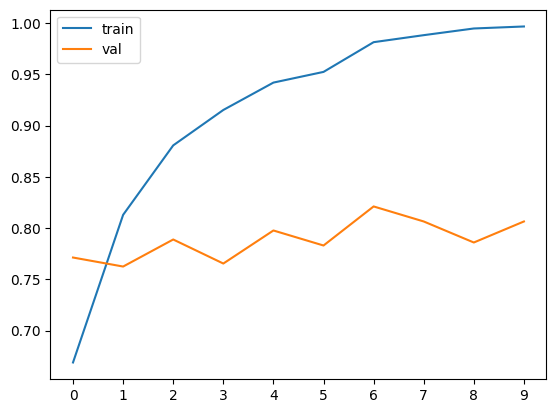

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

plt.xticks(np.arange(10))
plt.legend()

## Adjusting the learning rate

In [ ]:
def make_model(learning_rate=0.01):
  base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    )
  base_model.trainable = False

  ######################################################

  inputs = keras.Input(shape=(150,150,3))
  base = base_model(inputs, training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)
  outputs = keras.layers.Dense(10)(vectors)
  model = keras.Model(inputs, outputs)

  ######################################################

  preds = model.predict(x)

  optimizer = keras.optimizers.Adam(
    learning_rate = learning_rate
    )

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(
      optimizer=optimizer,
      loss=loss, metrics=['accuracy']
      )

  return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
  print(lr)

  model = make_model(learning_rate=lr)
  history = model.fit(
      train_ds,
      epochs = 10,
      validation_data = val_ds
  )
  scores[lr] = history.history

  print()
  print()

0.0001
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 195ms/step - accuracy: 0.2097 - loss: 2.2261 - val_accuracy: 0.4575 - val_loss: 1.6580
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.5044 - loss: 1.5228 - val_accuracy: 0.5806 - val_loss: 1.2883
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.6044 - loss: 1.2286 - val_accuracy: 0.6716 - val_loss: 1.0927
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.6698 - loss: 1.0330 - val_accuracy: 0.7097 - val_loss: 0.9735
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.7158 - loss: 0.9172 - val_accuracy: 0.7302 - val_loss: 0.8986
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.7247 - loss: 0.8725 - val_accuracy: 0.7390 - val_loss: 0.8404
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.7370 - loss: 0.8273 - val_accuracy: 0.7507 - val_loss: 0.8008
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 198ms/step - accuracy: 0.5773 - loss: 1.6284 - val_accuracy: 0.7419 - val_loss: 1.1200
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8286 - loss: 0.5218 - val_accuracy: 0.7713 - val_loss: 0.8031
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.8839 - loss: 0.3140 - val_accuracy: 0.7977 - val_loss: 0.8798
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9334 - loss: 0.1984 - val_accuracy: 0.7654 - val_loss: 1.0496
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9309 - loss: 0.2015 - val_accuracy: 0.8006 - val_loss: 0.8049
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.9563 - loss: 0.1249 - val_accuracy: 0.8006 - val_loss: 0.8973
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9678 - loss: 0.0893 - val_accuracy: 0.8065 - val_loss: 0.9672
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9764 - l

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 194ms/step - accuracy: 0.5521 - loss: 13.4828 - val_accuracy: 0.7273 - val_loss: 8.5932
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.7918 - loss: 4.6750 - val_accuracy: 0.7683 - val_loss: 6.1305
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.8364 - loss: 3.0311 - val_accuracy: 0.7771 - val_loss: 7.1826
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.8740 - loss: 2.4813 - val_accuracy: 0.7595 - val_loss: 8.2536
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.8952 - loss: 2.1568 - val_accuracy: 0.7859 - val_loss: 7.4924
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.8993 - loss: 2.1580 - val_accuracy: 0.7625 - val_loss: 8.6007
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9080 - loss: 1.9392 - val_accuracy: 0.7771 - val_loss: 8.8157
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9329 - 

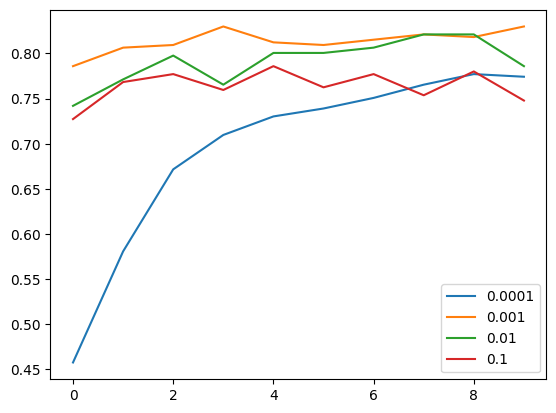

In [ ]:
for lr, hist in scores.items():
  plt.plot(hist['val_accuracy'], label=lr)
 #  plt.plot(hist['accuracy'], label=lr)
plt.legend()

In [ ]:
del scores[0.1]
del scores[0.0001]

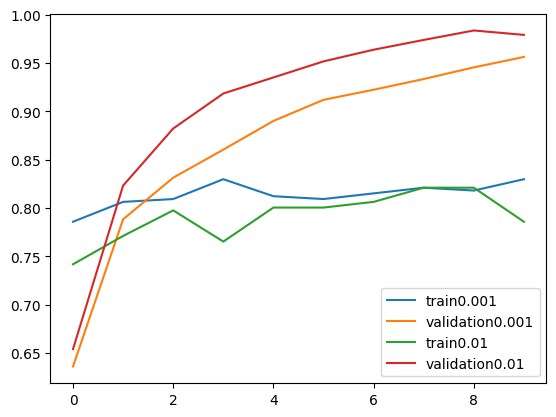

In [ ]:
for lr, hist in scores.items():
  plt.plot(hist['val_accuracy'], label=('train%s' % lr))
  plt.plot(hist['accuracy'], label=('validation%s' % lr))
plt.legend()

In [ ]:
learning_rate = 0.001

## Checkpointing
<p> - Saving the best model only</p>
<p> - Tranging a model with callbacks</p>

In [ ]:
model.save_weights('model_v1.h5', save_format='h5')

TypeError: Model.save_weights() got an unexpected keyword argument 'save_format'

In [ ]:
'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'.format(epoch=12, val_accuracy=0.824234)
# This Keras template to saving files that contain epoch number and accuracy and version in file name

'xception_v1_12_0.824.h5'

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
     'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
     save_best_only=True,
     monitor='val_accuracy',
     mode='max'
 )

In [ ]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)
history = model.fit(
    train_ds,
    epochs = 10,
    validation_data = val_ds,
    callbacks=[checkpoint]
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 199ms/step - accuracy: 0.5199 - loss: 1.4693 - val_accuracy: 0.7918 - val_loss: 0.7287
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.7857 - loss: 0.6498 - val_accuracy: 0.7977 - val_loss: 0.6269
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.8257 - loss: 0.5294 - val_accuracy: 0.7918 - val_loss: 0.6133
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8507 - loss: 0.4462

96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.8508 - loss: 0.4461 - val_accuracy: 0.8299 - val_loss: 0.5623
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.8865 - loss: 0.3751 - val_accuracy: 0.8123 - val_loss: 0.5509
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9179 - loss: 0.3315 - val_accuracy: 0.8299 - val_loss: 0.5310
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9163 - loss: 0.2919

96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9162 - loss: 0.2920 - val_accuracy: 0.8446 - val_loss: 0.5281
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.9416 - loss: 0.2531 - val_accuracy: 0.7859 - val_loss: 0.5715
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9457 - loss: 0.2325 - val_accuracy: 0.8358 - val_loss: 0.5163
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9599 - loss: 0.2054 - val_accuracy: 0.8240 - val_loss: 0.5349


<h3>Adding more layres</h3>

In [ ]:
def make_model(learning_rate=0.001,size_inner=100):
  base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    )
  base_model.trainable = False

  ######################################################

  inputs = keras.Input(shape=(150,150,3))
  base = base_model(inputs, training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)

  inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

  outputs = keras.layers.Dense(10)(inner)

  model = keras.Model(inputs, outputs)

  ######################################################

  preds = model.predict(x)

  optimizer = keras.optimizers.Adam(
    learning_rate = learning_rate
    )

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(
      optimizer=optimizer,
      loss=loss, metrics=['accuracy']
      )

  return model

In [ ]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
  print(size)

  model = make_model(learning_rate=learning_rate, size_inner=size)
  history = model.fit(
      train_ds,
      epochs = 10,
      validation_data = val_ds
  )
  scores[size] = history.history

  print()
  print()

10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 201ms/step - accuracy: 0.4220 - loss: 1.7709 - val_accuracy: 0.7214 - val_loss: 0.9386
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.7416 - loss: 0.8338 - val_accuracy: 0.7654 - val_loss: 0.7142
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.7955 - loss: 0.6316 - val_accuracy: 0.7830 - val_loss: 0.6557
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8277 - loss: 0.5255 - val_accuracy: 0.7947 - val_loss: 0.6038
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.8655 - loss: 0.4367 - val_accuracy: 0.8035 - val_loss: 0.5732
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.8874 - loss: 0.3740 - val_accuracy: 0.8065 - val_loss: 0.5633
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9063 - loss: 0.3227 - val_accuracy: 0.8094 - val_loss: 0.5790
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.9242

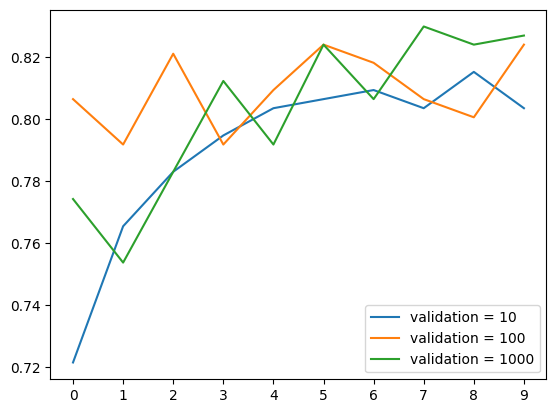

In [ ]:
for size, hist in scores.items():
  plt.plot(hist['val_accuracy'], label=('validation = %s' % size))
plt.xticks(np.arange(10))
plt.legend()

<p>As we don't see many changes with adding inner layers so we ignore it or hold its number low</p>

<h3>Regularization and Dropout</h3>

In [ ]:
def make_model(learning_rate=0.001,size_inner=100, droprate=0.5):
  base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    )
  base_model.trainable = False

  ######################################################

  inputs = keras.Input(shape=(150,150,3))
  base = base_model(inputs, training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)

  inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

  drop = keras.layers.Dropout(droprate)(inner)

  outputs = keras.layers.Dense(10)(drop)

  model = keras.Model(inputs, outputs)

  ######################################################

  preds = model.predict(x)

  optimizer = keras.optimizers.Adam(
    learning_rate = learning_rate
    )

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(
      optimizer=optimizer,
      loss=loss, metrics=['accuracy']
      )

  return model

In [ ]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
  print(droprate)

  model = make_model(
      learning_rate=learning_rate,
      size_inner=size,
      droprate=droprate
  )

  history = model.fit(
      train_ds,
      epochs = 30,
      validation_data = val_ds
  )
  scores[droprate] = history.history

  print()
  print()

0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 200ms/step - accuracy: 0.5770 - loss: 1.2811 - val_accuracy: 0.7947 - val_loss: 0.6294
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8107 - loss: 0.5162 - val_accuracy: 0.8094 - val_loss: 0.5762
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.8858 - loss: 0.3637 - val_accuracy: 0.8240 - val_loss: 0.5357
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9261 - loss: 0.2392 - val_accuracy: 0.8152 - val_loss: 0.5527
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9508 - loss: 0.1772 - val_accuracy: 0.8006 - val_loss: 0.5974
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9739 - loss: 0.1249 - val_accuracy: 0.8211 - val_loss: 0.5680
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9860 - loss: 0.0847 - val_accuracy: 0.8094 - val_loss: 0.5739
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.9921

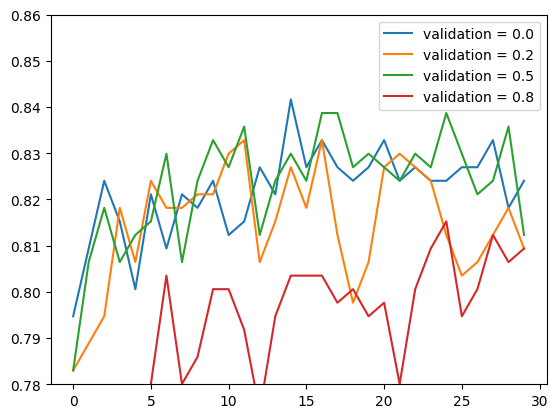

In [ ]:
for droprate, hist in scores.items():
  plt.plot(hist['val_accuracy'], label=('validation = %s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

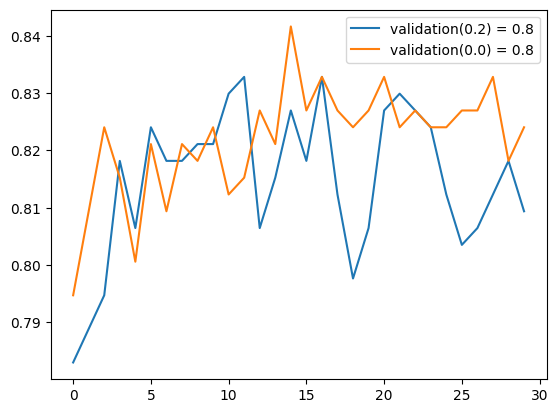

In [ ]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=('validation(0.2) = %s' % droprate))
#plt.plot(hist['accuracy'], label=('train(0.2) = %s' % droprate))
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=('validation(0.0) = %s' % droprate))
#plt.plot(hist['accuracy'], label=('train(0.0) = %s' % droprate))

plt.legend()

# Data Augmentation

In [ ]:
# Create image generator for train data and also augment the images
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                               rotation_range=30,
                               width_shift_range=10.0,
                               height_shift_range=10.0,
                               shear_range=10,
                               zoom_range=0.1,
                               vertical_flip=True)

train_ds = train_gen.flow_from_directory('./clothing-dataset-small/validation/',
                                         target_size=(150,150),
                                         batch_size=32)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation/',
    target_size=(150,150),
    batch_size=32,
    shuffle=False
)


Found 341 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


# Train alarge model

In [6]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [7]:
input_size = 299

In [8]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [9]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [10]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50,
                    validation_data=val_ds,
                   callbacks=[checkpoint]
                    )

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5650 - loss: 1.4080

96/96 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.5663 - loss: 1.4040 - val_accuracy: 0.8299 - val_loss: 0.5435
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.8196 - loss: 0.5483

96/96 ━━━━━━━━━━━━━━━━━━━━ 85s 879ms/step - accuracy: 0.8196 - loss: 0.5481 - val_accuracy: 0.8475 - val_loss: 0.4491
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 791ms/step - accuracy: 0.8559 - loss: 0.4297

96/96 ━━━━━━━━━━━━━━━━━━━━ 85s 886ms/step - accuracy: 0.8558 - loss: 0.4298 - val_accuracy: 0.8680 - val_loss: 0.3834
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 85s 881ms/step - accuracy: 0.8569 - loss: 0.3945 - val_accuracy: 0.8592 - val_loss: 0.3871
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 791ms/step - accuracy: 0.8917 - loss: 0.3343

96/96 ━━━━━━━━━━━━━━━━━━━━ 85s 887ms/step - accuracy: 0.8916 - loss: 0.3346 - val_accuracy: 0.8710 - val_loss: 0.3873
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 792ms/step - accuracy: 0.8937 - loss: 0.3228

96/96 ━━━━━━━━━━━━━━━━━━━━ 85s 882ms/step - accuracy: 0.8937 - loss: 0.3227 - val_accuracy: 0.8856 - val_loss: 0.3579
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 83s 864ms/step - accuracy: 0.8987 - loss: 0.2927 - val_accuracy: 0.8856 - val_loss: 0.3631
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 85s 883ms/step - accuracy: 0.9082 - loss: 0.2635 - val_accuracy: 0.8651 - val_loss: 0.3699
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - accuracy: 0.9028 - loss: 0.2706

96/96 ━━━━━━━━━━━━━━━━━━━━ 85s 883ms/step - accuracy: 0.9028 - loss: 0.2706 - val_accuracy: 0.8886 - val_loss: 0.3397
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 84s 874ms/step - accuracy: 0.9050 - loss: 0.2559 - val_accuracy: 0.8651 - val_loss: 0.3910
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 83s 866ms/step - accuracy: 0.9204 - loss: 0.2212 - val_accuracy: 0.8827 - val_loss: 0.3524
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - accuracy: 0.9378 - loss: 0.2031

96/96 ━━━━━━━━━━━━━━━━━━━━ 85s 883ms/step - accuracy: 0.9378 - loss: 0.2031 - val_accuracy: 0.8974 - val_loss: 0.3362
Epoch 13/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 84s 877ms/step - accuracy: 0.9331 - loss: 0.2013 - val_accuracy: 0.8798 - val_loss: 0.3670
Epoch 14/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 84s 871ms/step - accuracy: 0.9267 - loss: 0.1904 - val_accuracy: 0.8798 - val_loss: 0.3482
Epoch 15/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 85s 875ms/step - accuracy: 0.9369 - loss: 0.1898 - val_accuracy: 0.8622 - val_loss: 0.3587
Epoch 16/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 84s 880ms/step - accuracy: 0.9384 - loss: 0.1787 - val_accuracy: 0.8886 - val_loss: 0.3630
Epoch 17/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 84s 878ms/step - accuracy: 0.9487 - loss: 0.1597 - val_accuracy: 0.8798 - val_loss: 0.3579
Epoch 18/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 83s 868ms/step - accuracy: 0.9489 - loss: 0.1576 - val_accuracy: 0.8915 - val_loss: 0.3729
Epoch 19/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 83s 862ms/step - accuracy: 0.9525 - loss: 0.1387 - val_accuracy

# Using the model

In [11]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input


In [12]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [15]:
#model = keras.models.load_model('xception_v4_1_09_0.889.h5')
model = keras.models.load_model('xception_v4_1_12_0.897.h5')

## Evaluating the model

In [16]:
model.evaluate(test_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8928 - loss: 0.2876


[0.26516634225845337, 0.897849440574646]

In [17]:
import numpy as np

path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

img = load_img(path, target_size=(299, 299))

x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [18]:
X = preprocess_input(X)
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step


In [19]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

dict(zip(classes, pred[0]))

{'dress': np.float32(-2.0912511),
 'hat': np.float32(-3.6940968),
 'longsleeve': np.float32(-1.5423791),
 'outwear': np.float32(-1.5359085),
 'pants': np.float32(9.775782),
 'shirt': np.float32(-0.9500367),
 'shoes': np.float32(-2.996744),
 'shorts': np.float32(3.6588428),
 'skirt': np.float32(-3.7884922),
 't-shirt': np.float32(-2.2216234)}